### 1. Воздушные перевозки

Скачайте и распакуте следующий [архив](http://stat-computing.org/dataexpo/2009/2008.csv.bz2). Описание полей таблицы дано [здесь](http://www.transtats.bts.gov/Fields.asp?Table_ID=236).

Данные должны содержать перелеты воздушных судов в 2008 году (вероятно в США)

**Задание 1:** Рассчитать топ-10 массовых перевозчиков.

Т.к. мой компьютер зависал при попытке загрузить полную таблицу данных '2008.csv', я взяла урезанную таблицу '2008_part.csv', в которой 700 тыс данных по рейсам вместо 7 млн.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline


In [2]:
df = pd.read_csv('2008_part.csv')
df.head(5)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,6588715,2008,12,14,7,1623,1141,1946,1506,YV,...,6,25,0,NaN,0,280,0,0,0,0
1,6179044,2008,11,16,7,1225,1228,1804,1759,US,...,5,20,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,3343103,2008,6,15,7,2134,2120,2340,2316,F9,...,5,19,0,NaN,0,14,0,10,0,0
3,1422756,2008,3,30,7,2012,1912,2059,2003,UA,...,6,8,0,NaN,0,0,0,0,0,56
4,7001683,2008,12,7,7,1840,1845,2010,2014,DL,...,6,21,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [3]:
k = list(df['UniqueCarrier'].value_counts().head(10).index)
s = k[0]
for i in range(1,len(k)):
    s  = s +', ' + k[i]
print(s,' - топ-10 массовых перевозчиков')


WN, AA, OO, MQ, UA, US, DL, XE, NW, CO  - топ-10 массовых перевозчиков


**Задание 2:** Построить распределение причин отмены рейсов

In [4]:
reason = df['CancellationCode'].value_counts()
reason

B    5521
A    5449
C    2879
D       1
Name: CancellationCode, dtype: int64

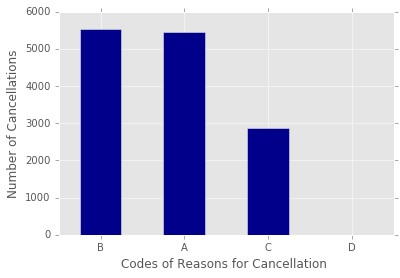

In [5]:
plt.xlabel('Codes of Reasons for Cancellation ')
plt.ylabel('Number of Cancellations')
reason.plot(kind = 'bar', rot=0, color = 'darkblue')


**Задание 3:** Найти самый популярный маршрут, выдать статистику по данному маршруту.

In [6]:
R = pd.DataFrame(df['Origin']+['-']+df['Dest'],columns = ['Route'])
Popular = R['Route'].value_counts().head(1).index
print ('The most popular route is', Popular[0])
R = pd.DataFrame(df['Origin']+df['Dest'],columns = ['Route'])
Popular = R['Route'].value_counts().head(1).idxmax()

The most popular route is SFO-LAX


In [7]:
df.loc[df['Origin']+df['Dest'] == Popular].describe()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1387.000000,1387,1387.000000,1387.000000,1387.000000,1340.000000,1387.000000,1338.000000,1387.000000,1387.000000,...,1387,1338.000000,1340.00000,1387.000000,1387.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,3426605.933670,2008,6.338861,15.606345,3.793079,1384.024627,1371.942322,1495.700299,1509.122567,1807.792358,...,337,9.929746,17.03806,0.033886,0.001442,8.818182,0.068182,7.698052,0.035714,47.451299
std,1979744.336913,0,3.326263,8.731156,1.987627,485.458174,471.512285,498.363745,471.024043,1944.614187,...,0,5.109672,6.80185,0.181001,0.037959,24.027252,1.196586,15.076236,0.626783,51.395328
min,1900.000000,2008,1.000000,1.000000,1.000000,205.000000,600.000000,1.000000,6.000000,119.000000,...,337,2.000000,5.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1807276.500000,2008,4.000000,8.000000,2.000000,946.000000,945.000000,1101.000000,1115.000000,817.000000,...,337,7.000000,12.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.750000
50%,3245692.000000,2008,6.000000,15.000000,4.000000,1414.000000,1400.000000,1530.000000,1525.000000,1151.000000,...,337,9.000000,15.50000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,32.000000
75%,5062079.000000,2008,9.000000,23.000000,5.000000,1809.000000,1805.000000,1917.000000,1928.000000,1943.000000,...,337,12.000000,20.00000,0.000000,0.000000,7.000000,0.000000,11.000000,0.000000,69.000000
max,6942470.000000,2008,12.000000,31.000000,7.000000,2359.000000,2240.000000,2359.000000,2359.000000,7815.000000,...,337,48.000000,68.00000,1.000000,1.000000,191.000000,21.000000,203.000000,11.000000,345.000000


**Задание 4:** Найти топ-5 рейсов по каждому из типов delay. Каким перевозчикам они принадлежат?

In [8]:
CarrierDelay = df[df['CarrierDelay'] > 0][['FlightNum', 'UniqueCarrier']]
WeatherDelay = df[df['WeatherDelay'] > 0][['FlightNum', 'UniqueCarrier']]
NASDelay = df[df['NASDelay'] > 0][['FlightNum', 'UniqueCarrier']]
SecurityDelay = df[df['SecurityDelay'] > 0][['FlightNum', 'UniqueCarrier']]
LateAircraftDelay = df[df['LateAircraftDelay'] > 0][['FlightNum', 'UniqueCarrier']]

k = CarrierDelay.groupby(['FlightNum','UniqueCarrier']).size().reset_index().rename(columns={0:'count'}).sort_values(by = 'count', ascending = False).head(5)
print('Топ-5 рейсов по типу CarrierDelay: ')
for index, row in k.iterrows():
    print ('Номер рейса -', str(row['FlightNum'])+ ',', 'перевозчик - ', str(row['UniqueCarrier']))
print()
k = WeatherDelay.groupby(['FlightNum','UniqueCarrier']).size().reset_index().rename(columns={0:'count'}).sort_values(by = 'count', ascending = False).head(5)
print('Топ-5 рейсов по типу WeatherDelay: ')
for index, row in k.iterrows():
    print ('Номер рейса -', str(row['FlightNum'])+ ',', 'перевозчик - ', str(row['UniqueCarrier']))
print()

k = NASDelay.groupby(['FlightNum','UniqueCarrier']).size().reset_index().rename(columns={0:'count'}).sort_values(by = 'count', ascending = False).head(5)
print('Топ-5 рейсов по типу NASDelay: ')
for index, row in k.iterrows():
    print ('Номер рейса -', str(row['FlightNum'])+ ',', 'перевозчик - ', str(row['UniqueCarrier']))
print()
k = SecurityDelay.groupby(['FlightNum','UniqueCarrier']).size().reset_index().rename(columns={0:'count'}).sort_values(by = 'count', ascending = False).head(5)
print('Топ-5 рейсов по типу SecurityDelay: ')
for index, row in k.iterrows():
    print ('Номер рейса -', str(row['FlightNum'])+ ',', 'перевозчик - ', str(row['UniqueCarrier']))
print()
k = LateAircraftDelay.groupby(['FlightNum','UniqueCarrier']).size().reset_index().rename(columns={0:'count'}).sort_values(by = 'count', ascending = False).head(5)
print('Топ-5 рейсов по типу LateAircraftDelay: ')
for index, row in k.iterrows():
    print ('Номер рейса -', str(row['FlightNum'])+ ',', 'перевозчик - ', str(row['UniqueCarrier']))

Топ-5 рейсов по типу CarrierDelay: 
Номер рейса - 24, перевозчик -  WN
Номер рейса - 1828, перевозчик -  AA
Номер рейса - 50, перевозчик -  WN
Номер рейса - 1555, перевозчик -  AA
Номер рейса - 33, перевозчик -  WN

Топ-5 рейсов по типу WeatherDelay: 
Номер рейса - 539, перевозчик -  CO
Номер рейса - 449, перевозчик -  CO
Номер рейса - 5685, перевозчик -  OH
Номер рейса - 549, перевозчик -  CO
Номер рейса - 5516, перевозчик -  OH

Топ-5 рейсов по типу NASDelay: 
Номер рейса - 1189, перевозчик -  CO
Номер рейса - 61, перевозчик -  AS
Номер рейса - 1555, перевозчик -  AA
Номер рейса - 1807, перевозчик -  AA
Номер рейса - 1763, перевозчик -  AA

Топ-5 рейсов по типу SecurityDelay: 
Номер рейса - 2848, перевозчик -  XE
Номер рейса - 2718, перевозчик -  YV
Номер рейса - 2050, перевозчик -  XE
Номер рейса - 167, перевозчик -  AS
Номер рейса - 52, перевозчик -  AS

Топ-5 рейсов по типу LateAircraftDelay: 
Номер рейса - 24, перевозчик -  WN
Номер рейса - 40, перевозчик -  WN
Номер рейса - 54, 

**Задание 5:** Определить, как распределено количество рейсов от времени дня?

555     1708
600     1638
655     1552
700     1500
556     1489
557     1416
558     1338
656     1254
657     1217
658     1179
559     1172
1500    1124
755     1124
825     1119
659     1110
900     1106
855     1098
1000    1084
1700    1077
625     1068
1325    1067
630     1060
1655    1051
1120    1043
1055    1038
1555    1037
800     1037
830     1032
1100    1018
1750    1018
        ... 
445        1
426        1
443        1
146        1
431        1
440        1
444        1
243        1
201        1
400        1
239        1
252        1
254        1
256        1
300        1
236        1
235        1
310        1
317        1
322        1
328        1
329        1
334        1
335        1
346        1
350        1
356        1
357        1
206        1
314        1
Name: DepTime, dtype: int64


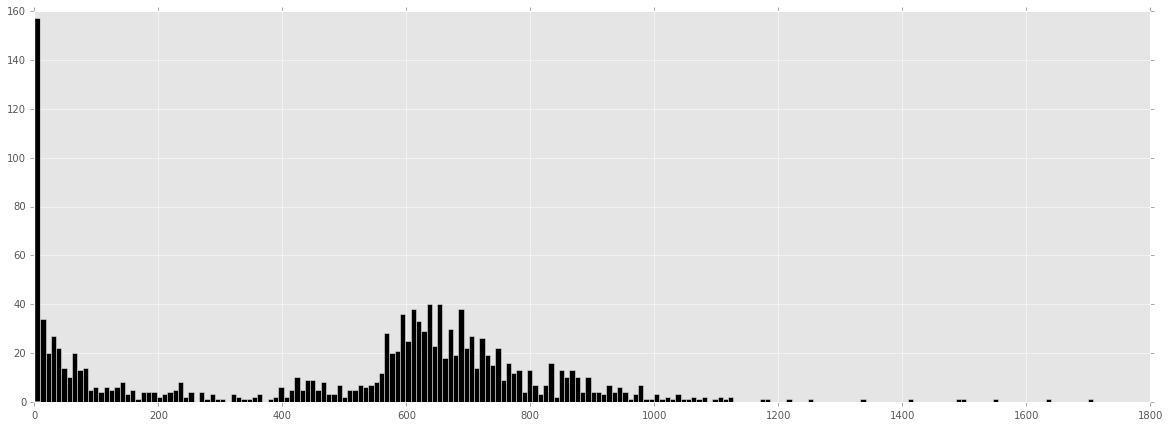

In [9]:
time = df['DepTime'].value_counts()
print(time)
time.hist(color = 'k', bins = 200, figsize=(20,7))
plt.show()


**Задание 6:** Определить "сезонность" во временных рядах по количеству вылетов на каждый день.

In [10]:
Date = df[['Month', 'DayofMonth']]
Date['NumberOfFlights'] = 1
Date = Date.groupby(['Month', 'DayofMonth']).sum()
Date.reset_index(inplace=True)
Date.index = Date.index + 1
Date

C:\Users\Полина\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Month,DayofMonth,NumberOfFlights
1,1,1,1875
2,1,2,2124
3,1,3,2095
4,1,4,2112
5,1,5,1806
6,1,6,2036
7,1,7,1988
8,1,8,2018
9,1,9,2015
10,1,10,2010


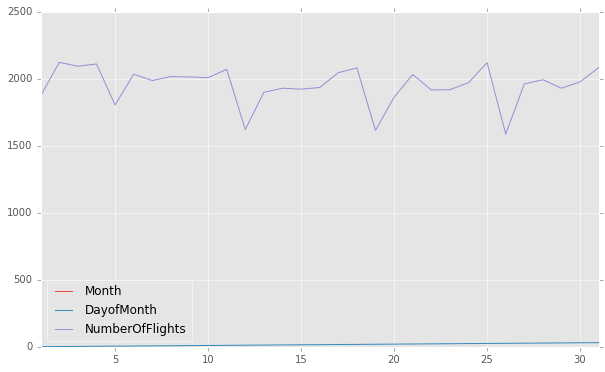

In [11]:
Date[Date['Month']==1].plot(figsize=(10,6))

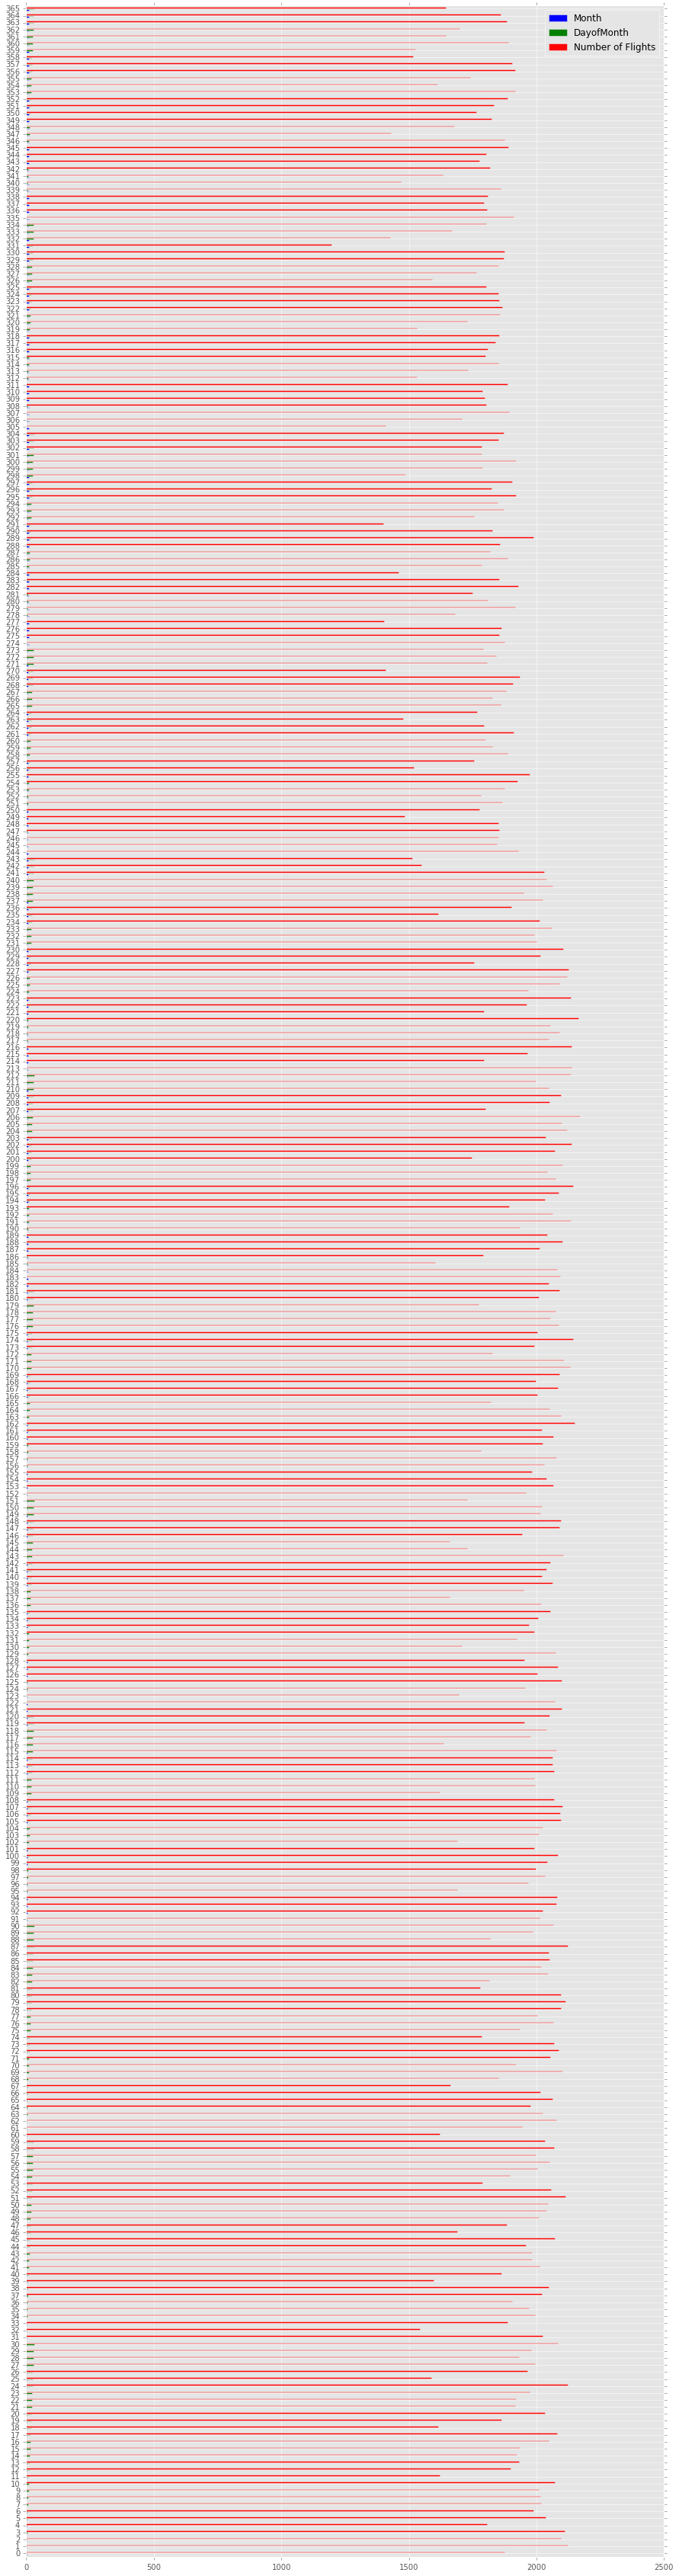

In [12]:
seasonality = df[['Month', 'DayofMonth']]
seasonality.groupby(['Month','DayofMonth']).size().reset_index(name='Number of Flights').plot(kind='barh', figsize=(15,60))


### 2. Продолжаем изучать Pandas

Ввиду ограниченности времени, мы не успеваем рассмотреть всё на семинарах. Поэтому часть работы ложится на вас..

Загрузите две csv таблицы [отсюда](https://github.com/emorisse/FBI-Hate-Crime-Statistics) и импортируйте через Pandas. В них содержатся агрегированные данные по различным организациям\городам США, содержащие количество обращений по тем или иным случаям нарушения закона. В одной таблице (table13.csv) перечислены управления, которые сообщали об этих случаях, в другой - которые не сообщали.

**Задание 1:** Изучите документации для методов `unique_values`, `isin`. С помощью этой функции, определите, содержатся ли в двух таблицах одни и те же штаты.

In [13]:
df1 = pd.read_csv('table13.csv')
df1.head(10)

,State,Agency type,Agency name,Race,Religion,Sexual orientation,Ethnicity,Disability,Gender,Gender Identity,1st quarter,2nd quarter,3rd quarter,4th quarter,Population
0,Alabama,Cities,Florence,2,0,0,0,0,0,0,0,1,0,1,"39,481"
1,Alabama,Cities,Hoover,0,0,1,0,0,0,0,0,1,0,0,"84,139"
2,Alabama,Cities,Prattville,2,0,0,0,0,0,0,1,0,1,0,"35,154"
3,Alabama,Cities,Tuscaloosa,1,0,0,0,0,0,0,0,0,1,0,"94,126"
4,Alaska,Cities,Anchorage,8,0,0,0,0,0,0,2,3,3,0,"299,455"
5,Arizona,Cities,Apache Junction,1,0,0,0,0,0,0,1,0,0,NaN,"36,626"
6,Arizona,Cities,Avondale,4,0,0,1,0,0,0,1,1,3,0,"78,905"
7,Arizona,Cities,Eagar,0,0,0,1,0,0,0,0,1,0,0,"5,034"
8,Arizona,Cities,El Mirage,1,0,0,0,0,0,0,0,0,1,0,"32,837"
9,Arizona,Cities,Gilbert,1,0,0,0,0,0,0,1,0,0,0,"225,232"


In [14]:
df2 = pd.read_csv('table14.csv')
df2.head(10)

,State,Agency Type,Agency Name,Q1,Q2,Q3,Q4,Population
0,Alabama,Cities,Ashford,0,0,0,0,"2,177"
1,Alabama,Cities,Ashland,0,0,0,0,"1,926"
2,Alabama,Cities,Auburn,0,0,0,0,"57,970"
3,Alabama,Cities,Berry,NaN,0,NaN,NaN,"1,124"
4,Alabama,Cities,Childersburg,0,0,0,0,"5,111"
5,Alabama,Cities,Courtland,0,0,0,0,607
6,Alabama,Cities,Demopolis,0,0,0,0,"7,240"
7,Alabama,Cities,Eclectic,0,0,0,0,"1,015"
8,Alabama,Cities,Enterprise,0,0,0,0,"28,145"
9,Alabama,Cities,Eutaw,0,0,0,0,"2,871"


In [15]:
x1 = df1['State'].isin(df2['State'])
x2 = df2['State'].isin(df1['State'])
k = 0
for i in x1:
    if i == False:
        k += 1
if k > 0:
    print('В первой таблице содержатся штаты, которых нет во второй таблице ')
else:
    print('Все штаты из первой таблицы содержатся во второй')
k = 0
for i in x2:
    if i == False:
        k += 1
if k > 0:
    print('В0 второй таблице содержатся штаты, которых нет в первой таблице ')
else:
    print('Все штаты из второй таблицы содержатся в первой')

В первой таблице содержатся штаты, которых нет во второй таблице 
Все штаты из второй таблицы содержатся в первой


**Задание 2:** Изучите документации для методов `append`, `merge` и `concat`. Совместите две таблицы в одну.

In [16]:
print(df1.keys())
print(df2.keys())

Index(['State', 'Agency type', 'Agency name', 'Race', 'Religion',
       'Sexual orientation', 'Ethnicity', 'Disability', 'Gender',
       'Gender Identity', '1st quarter', '2nd quarter', '3rd quarter',
       '4th quarter', 'Population'],
      dtype='object')
Index(['State', 'Agency Type', 'Agency Name', 'Q1', 'Q2', 'Q3', 'Q4',
       'Population'],
      dtype='object')


In [17]:
df2.columns = ['State', 'Agency type', 'Agency name', '1st quarter', '2nd quarter', '3rd quarter','4th quarter', 'Population']
df3 = df1.append(df2, ignore_index=True)   

cols = ['State', 'Agency type', 'Agency name', 'Race', 'Religion',
       'Sexual orientation', 'Ethnicity', 'Disability', 'Gender',
       'Gender Identity', '1st quarter', '2nd quarter', '3rd quarter',
       '4th quarter', 'Population']
df3 = df3[cols]
df3

,State,Agency type,Agency name,Race,Religion,Sexual orientation,Ethnicity,Disability,Gender,Gender Identity,1st quarter,2nd quarter,3rd quarter,4th quarter,Population
0,Alabama,Cities,Florence,2,0,0,0,0,0,0,0,1,0,1,"39,481"
1,Alabama,Cities,Hoover,0,0,1,0,0,0,0,0,1,0,0,"84,139"
2,Alabama,Cities,Prattville,2,0,0,0,0,0,0,1,0,1,0,"35,154"
3,Alabama,Cities,Tuscaloosa,1,0,0,0,0,0,0,0,0,1,0,"94,126"
4,Alaska,Cities,Anchorage,8,0,0,0,0,0,0,2,3,3,0,"299,455"
5,Arizona,Cities,Apache Junction,1,0,0,0,0,0,0,1,0,0,NaN,"36,626"
6,Arizona,Cities,Avondale,4,0,0,1,0,0,0,1,1,3,0,"78,905"
7,Arizona,Cities,Eagar,0,0,0,1,0,0,0,0,1,0,0,"5,034"
8,Arizona,Cities,El Mirage,1,0,0,0,0,0,0,0,0,1,0,"32,837"
9,Arizona,Cities,Gilbert,1,0,0,0,0,0,0,1,0,0,0,"225,232"


**Задание 3:** Изучите документации для методов `drop_dublicates` и `dropna`. Используйте метод `dropna` для очистки большой таблицы от пропусков. Что произошло? Почему? Исправьте таблицы, чтобы получить корректный ответ.

In [18]:
df30 = df3.dropna(how='any') # произошло удаление всех строк с отсутствующими данными
df30

,State,Agency type,Agency name,Race,Religion,Sexual orientation,Ethnicity,Disability,Gender,Gender Identity,1st quarter,2nd quarter,3rd quarter,4th quarter,Population
0,Alabama,Cities,Florence,2,0,0,0,0,0,0,0,1,0,1,"39,481"
1,Alabama,Cities,Hoover,0,0,1,0,0,0,0,0,1,0,0,"84,139"
2,Alabama,Cities,Prattville,2,0,0,0,0,0,0,1,0,1,0,"35,154"
3,Alabama,Cities,Tuscaloosa,1,0,0,0,0,0,0,0,0,1,0,"94,126"
4,Alaska,Cities,Anchorage,8,0,0,0,0,0,0,2,3,3,0,"299,455"
6,Arizona,Cities,Avondale,4,0,0,1,0,0,0,1,1,3,0,"78,905"
7,Arizona,Cities,Eagar,0,0,0,1,0,0,0,0,1,0,0,"5,034"
8,Arizona,Cities,El Mirage,1,0,0,0,0,0,0,0,0,1,0,"32,837"
9,Arizona,Cities,Gilbert,1,0,0,0,0,0,0,1,0,0,0,"225,232"
10,Arizona,Cities,Glendale,2,3,1,1,0,0,0,2,0,3,2,"234,006"


В данном задании не совсем понятно, к какому правильному виду необходимо привести таблицу, потому что можно как заменить все пропуски нулями для сохранения полного вида таблицы, так и удалить строки, в которых нет никакой другой информации кроме State, Agency type  и  Agency name, а остальные пропущенные данные заменить уже нулями. Поэтому я приведу оба способа.

In [19]:
#Способ 1 с простой заменой недостающих данных нулями
df31 = df3.fillna(0)
df31

,State,Agency type,Agency name,Race,Religion,Sexual orientation,Ethnicity,Disability,Gender,Gender Identity,1st quarter,2nd quarter,3rd quarter,4th quarter,Population
0,Alabama,Cities,Florence,2,0,0,0,0,0,0,0,1,0,1,"39,481"
1,Alabama,Cities,Hoover,0,0,1,0,0,0,0,0,1,0,0,"84,139"
2,Alabama,Cities,Prattville,2,0,0,0,0,0,0,1,0,1,0,"35,154"
3,Alabama,Cities,Tuscaloosa,1,0,0,0,0,0,0,0,0,1,0,"94,126"
4,Alaska,Cities,Anchorage,8,0,0,0,0,0,0,2,3,3,0,"299,455"
5,Arizona,Cities,Apache Junction,1,0,0,0,0,0,0,1,0,0,0,"36,626"
6,Arizona,Cities,Avondale,4,0,0,1,0,0,0,1,1,3,0,"78,905"
7,Arizona,Cities,Eagar,0,0,0,1,0,0,0,0,1,0,0,"5,034"
8,Arizona,Cities,El Mirage,1,0,0,0,0,0,0,0,0,1,0,"32,837"
9,Arizona,Cities,Gilbert,1,0,0,0,0,0,0,1,0,0,0,"225,232"


In [20]:
#Способ 2 с удалением строк, где нету никакой информации кроме State, Agency type  и  Agency name
#с последующей заменой недостающих данных на нули
df22 = df2.replace('0', np.nan)
df32 = df1.append(df2, ignore_index=True) 
cols = ['State', 'Agency type', 'Agency name', 'Race', 'Religion',
       'Sexual orientation', 'Ethnicity', 'Disability', 'Gender',
       'Gender Identity', '1st quarter', '2nd quarter', '3rd quarter',
       '4th quarter', 'Population']
df32 = df32[cols]
df32 = df32.dropna(how='all', thresh=None, subset=[ 'Race', 'Religion',
       'Sexual orientation', 'Ethnicity', 'Disability', 'Gender',
       'Gender Identity', '1st quarter', '2nd quarter', '3rd quarter',
       '4th quarter', 'Population'], inplace=False)
df32.fillna(0)

,State,Agency type,Agency name,Race,Religion,Sexual orientation,Ethnicity,Disability,Gender,Gender Identity,1st quarter,2nd quarter,3rd quarter,4th quarter,Population
0,Alabama,Cities,Florence,2,0,0,0,0,0,0,0,1,0,1,"39,481"
1,Alabama,Cities,Hoover,0,0,1,0,0,0,0,0,1,0,0,"84,139"
2,Alabama,Cities,Prattville,2,0,0,0,0,0,0,1,0,1,0,"35,154"
3,Alabama,Cities,Tuscaloosa,1,0,0,0,0,0,0,0,0,1,0,"94,126"
4,Alaska,Cities,Anchorage,8,0,0,0,0,0,0,2,3,3,0,"299,455"
5,Arizona,Cities,Apache Junction,1,0,0,0,0,0,0,1,0,0,0,"36,626"
6,Arizona,Cities,Avondale,4,0,0,1,0,0,0,1,1,3,0,"78,905"
7,Arizona,Cities,Eagar,0,0,0,1,0,0,0,0,1,0,0,"5,034"
8,Arizona,Cities,El Mirage,1,0,0,0,0,0,0,0,0,1,0,"32,837"
9,Arizona,Cities,Gilbert,1,0,0,0,0,0,0,1,0,0,0,"225,232"


**Задание 4:** Изучите документации для методов `set_index`, `reset_index` и `pivot_table`. Проиндексируйте общую таблицу по переменным State и Agency Type (одновременно). У вас должен появиться *мультииндекс*.

In [34]:
p = df31.set_index(['State'],['Agency type'])
p.head(60)

,Agency type,Agency name,Race,Religion,Sexual orientation,Ethnicity,Disability,Gender,Gender Identity,1st quarter,2nd quarter,3rd quarter,4th quarter,Population
State,,,,,,,,,,,,,,
Alabama,Cities,Florence,2,0,0,0,0,0,0,0,1,0,1,"39,481"
Alabama,Cities,Hoover,0,0,1,0,0,0,0,0,1,0,0,"84,139"
Alabama,Cities,Prattville,2,0,0,0,0,0,0,1,0,1,0,"35,154"
Alabama,Cities,Tuscaloosa,1,0,0,0,0,0,0,0,0,1,0,"94,126"
Alaska,Cities,Anchorage,8,0,0,0,0,0,0,2,3,3,0,"299,455"
Arizona,Cities,Apache Junction,1,0,0,0,0,0,0,1,0,0,0,"36,626"
Arizona,Cities,Avondale,4,0,0,1,0,0,0,1,1,3,0,"78,905"
Arizona,Cities,Eagar,0,0,0,1,0,0,0,0,1,0,0,"5,034"
Arizona,Cities,El Mirage,1,0,0,0,0,0,0,0,0,1,0,"32,837"


**Задание 5:** В Pandas можно идерировать по DataFrame! Ищучите документации для методов `iteritems`, `iterrows`, а так же посмотрите, как можно итерировать по сгруппированным DataFrame'ам. Выделите подтаблицу, состаящую из данных по 3 произвольным штатам и сгруппируйте её по переменным State и Agency Type. С помощью изученных методов (то есть итеративно) выведите суммарную популяцию по каждой паре <Штат>-<Тип>

In [35]:
q = p.loc[['Arizona','Arkansas', 'California']].reset_index()
q

,State,Agency type,Agency name,Race,Religion,Sexual orientation,Ethnicity,Disability,Gender,Gender Identity,1st quarter,2nd quarter,3rd quarter,4th quarter,Population
0,Arizona,Cities,Apache Junction,1,0,0,0,0,0,0,1,0,0,0,"36,626"
1,Arizona,Cities,Avondale,4,0,0,1,0,0,0,1,1,3,0,"78,905"
2,Arizona,Cities,Eagar,0,0,0,1,0,0,0,0,1,0,0,"5,034"
3,Arizona,Cities,El Mirage,1,0,0,0,0,0,0,0,0,1,0,"32,837"
4,Arizona,Cities,Gilbert,1,0,0,0,0,0,0,1,0,0,0,"225,232"
5,Arizona,Cities,Glendale,2,3,1,1,0,0,0,2,0,3,2,"234,006"
6,Arizona,Cities,Goodyear,0,0,2,0,0,0,0,1,0,1,0,"71,048"
7,Arizona,Cities,Maricopa,1,0,0,0,0,0,0,0,0,0,1,"44,871"
8,Arizona,Cities,Mesa,1,1,0,0,0,0,0,2,0,0,0,"456,155"
9,Arizona,Cities,Phoenix,40,12,14,14,1,0,0,25,21,35,0,"1,502,139"


In [36]:
q['Population'] = pd.to_numeric(q['Population'].str.replace(',',''))
l = q.groupby(['State','Agency type'])
l.size()

for key, group in l:
    print(key, '-' ,(group['Population']).sum())


('Arizona', 'Cities') - 4926154.0
('Arizona', 'Metropolitan Counties') - 0.0
('Arizona', 'Nonmetropolitan Counties') - 0.0
('Arizona', 'Other Agencies') - 0.0
('Arizona', 'State Agencies') - 0.0
('Arizona', 'Universities and Colleges') - 187881.0
('Arkansas', 'Cities') - 1739230.0
('Arkansas', 'Metropolitan Counties') - 0.0
('Arkansas', 'Nonmetropolitan Counties') - 0.0
('Arkansas', 'State Agencies') - 0.0
('Arkansas', 'Universities and Colleges') - 91341.0
('California', 'Cities') - 31696400.0
('California', 'Metropolitan Counties') - 0.0
('California', 'Nonmetropolitan Counties') - 0.0
('California', 'Other Agencies') - 0.0
('California', 'State Police Agencies') - 0.0
('California', 'Universities and Colleges') - 953695.0


## 3. Метод градиентного спуска

Напомним суть метода градиентого спуска в контексте задачи линейной регрессии.

Дано описание $n$ объектов по $m$ признакам. Обычно оно выражается в виде матрицы размера $n \times m$: $X = [x^{(i)}_j]^{i=1\dots n}_{j=1\dots m} $.<br\> ($x^{(i)}_j$ означает $j$-ый признак $i$-го объекта) <br\>
Дана зависимая переменная, которая тоже имеет отношение к этим объекам: $y$ - вектор длины $n$.

Наша задача, выявить **линейную** зависимость между признаками в $X$ и значениями в $y$:
$$\hat{y} = X\beta \quad \Leftrightarrow \quad \hat{y}^{(i)} = \beta_0 + \beta_1x^{(i)}_1 + \dots$$

И сделать это так, чтобы квадрат суммы ошибок наших оценок был минимален:
$$ L(\beta) = \frac{1}{2n}(\hat{y} - y)^{\top}(\hat{y} - y) = \frac{1}{2n}(X\beta - y)^{\top}(X\beta - y) \rightarrow \min$$ $$ \Updownarrow $$  $$ L(\beta_0,\beta_1,\dots) = \frac{1}{2n}\sum^{n}_{i=1}(\hat{y}^{(i)} - y^{(i)})^2 = \frac{1}{2n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 + \dots - y^{(i)})^2  \rightarrow \min $$

Значение в $X$ и $y$ нам даны. Нам неизвестны только значения коэффициентов $\beta$.<br\> Соответственно, нужно найти такие значения $\beta$, что функция $L(\beta) \rightarrow \min.$

На семинаре мы выяснили, чему равен градиент функции потерь $L(\beta_0, \beta_1):$
$$ \frac{\partial L}{\partial \beta_0} = \frac{1}{n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 - y^{(i)})$$
$$ \frac{\partial L}{\partial \beta_1} = \frac{1}{n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 - y^{(i)})x_1^{(i)}$$

Иногда проще это записать в виде матриц:
$$ \frac{\partial L}{\partial \beta} = X^\top(X\beta - y)$$


Метод градиентного спуска заключается в итеративном и **одновременном(!!!)** обновлении значений $\beta$ в направлении, противоположному градиенту:
$$ \beta := \beta - \alpha\frac{\partial L}{\partial \beta}$$

**Задача 1:** Загрузите [данные](http://bit.ly/1gIQs6C) по характеристикам автомобилей Honda Accord. Названия столбцов говорят сами за себя.

Составьте матрицу $X$, состоящую из единичного столбца и признака "пробег". <br\>
Составьте вектор $y$ состоящий из стоимости автомобиля.

Если для импорта вы используете `pandas`, то через .values из DataFrame можно получить numpy array.

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import scipy.optimize as opt
import sympy

plt.style.use('ggplot')

%matplotlib inline

In [25]:
df4 = pd.read_csv('accord_sedan_training.csv') 
df4.head(40)

,price,mileage,year,trim,engine,transmission
0,14995,67697,2006,ex,4 Cyl,Manual
1,11988,73738,2006,ex,4 Cyl,Manual
2,11999,80313,2006,lx,4 Cyl,Automatic
3,12995,86096,2006,lx,4 Cyl,Automatic
4,11333,79607,2006,lx,4 Cyl,Automatic
5,10067,96966,2006,lx,4 Cyl,Automatic
6,8999,126150,2006,lx,4 Cyl,Automatic
7,10595,119255,2006,lx,4 Cyl,Automatic
8,13988,73513,2006,exl,4 Cyl,Automatic
9,13990,50649,2006,ex,4 Cyl,Automatic


In [26]:
A = df4['mileage'].head(5).values
b = np.ones(shape=(1,A.size))
X = np.vstack((b,A)).T
Y = df4['price'].head(5).values
c = np.zeros(shape = (1,Y.size))
y = (c + Y).T

**Задача 2:** Изобразите функционал квадратичной ошибки $L(\beta_0, \beta_1)$ в 3D и его линии уровня

In [27]:
theta1 = np.linspace(-7, 7,100)
theta2 = np.linspace(-7, 7, 100)
Theta1, Theta2 = np.meshgrid(theta1,theta2)
s = np.zeros(shape=(len(Theta1), len(Theta2)))
for i in range(len(X)):
    s = s + ((Theta1*X[i][0]+ Theta2*X[i][1] - y[i]))**2
s = s/(2*len(X))

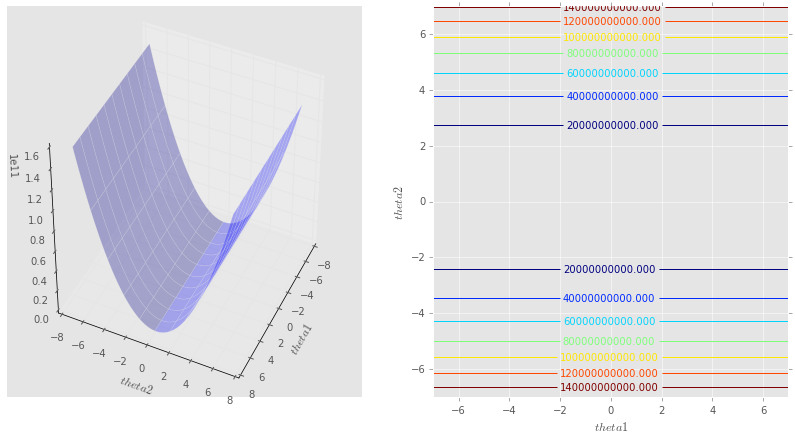

In [28]:
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.view_init(40, 25)
ax.plot_surface(Theta1, Theta2, s, alpha=0.3,)
ax.set_xlabel('$theta1$')
ax.set_ylabel('$theta2$')


ax = fig.add_subplot(1, 2, 2)
contour = ax.contour(Theta1, Theta2, s)
plt.clabel(contour, inline=1, fontsize=10)
ax.set_xlabel('$theta1$')
ax.set_ylabel('$theta2$')

**Задача 3:** Напишите код, реализующий метод градиентного спуска. На вход метод должен принимать исходные данные, максимальное кол-во итераций и коэффициент скорости спуска.

In [29]:
theta = np.random.rand(2,1)
def MSE(X, y, theta):
    coef = 1/(2 * len(y))
    Q = (X.dot(theta) - y) ** 2
    Q = np.sum(Q)*coef
    return Q

print(MSE(X, y, theta))

351494125.022


In [30]:
def MSE_grad(X, y, theta):
    G = (X.T).dot((X.dot(theta) - y))
    return G
print(MSE_grad(X, y, theta))


[[  1.31054740e+05]
 [  1.02761666e+10]]


In [31]:
iters = 40
step = 0.001
def grad_descent(X, y, theta, step, iters):
    cur_theta = theta.copy()
    Q = [MSE(X, y, cur_theta)]
    for t in range(1, iters):
        prev_theta = cur_theta.copy()
        cur_theta = cur_theta - step * MSE_grad(X, y, cur_theta)
        Q.append(MSE(X, y, cur_theta))
        if np.linalg.norm(cur_theta - prev_theta) < 1e-5:
            return [cur_theta]
    return [cur_theta]

**Задача 4:** Выведите полученные значения коэфициентов $\beta$. <br\>Как они интерпретируются?  <br\>Изобразите на одном графике $[y - \text{"пробег"}]$ точки и полученную прямую.

In [32]:
print(grad_descent(X, y, theta, step, iters))

[array([[ -2.34975288e+286],
       [ -1.83274491e+291]])]
